In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Loading the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
# 1. Exploring basic info
print("=== Dataset Info ===")
print(df.info())
print("\n=== Null Values ===")
print(df.isnull().sum())
print("\n=== Data Types ===")
print(df.dtypes)

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Null Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

In [4]:
# 2. Handling missing values
# For numerical columns - fill with median
num_cols = ['Age', 'Fare']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns - fill with mode
cat_cols = ['Embarked', 'Cabin']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop columns with too many missing values or not useful
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


/tmp/ipython-input-2096687591.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2096687591.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [5]:
# 3. Converting categorical features to numerical
# Label encoding for ordinal categories
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [6]:
# One-hot encoding for nominal categories
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])

In [7]:
# 4. Normalize/standardize numerical features
# Standardization (mean=0, std=1)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

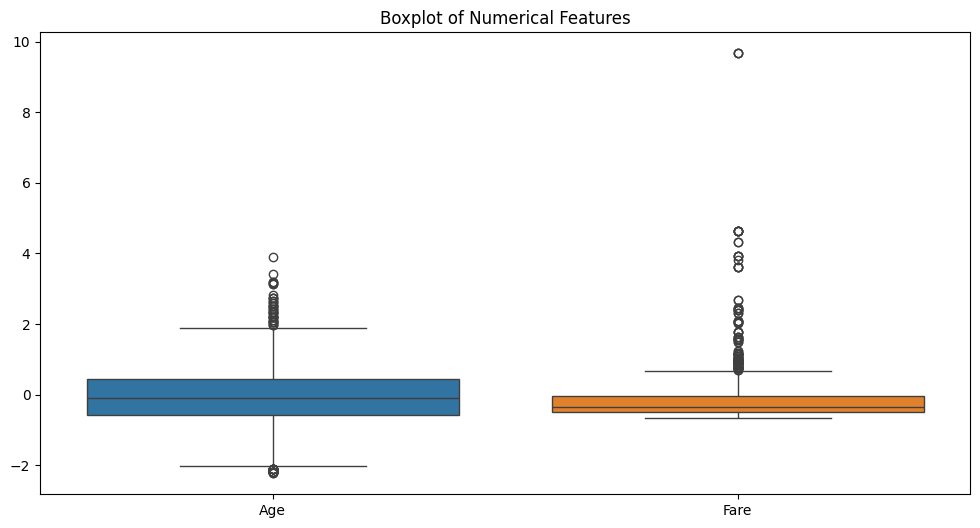

In [8]:
# 5. Visualize and handle outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [9]:
# Handling outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


In [10]:
# Final cleaned dataset
print("\n=== Cleaned Dataset Info ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())


=== Cleaned Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    718 non-null    int64  
 1   Pclass      718 non-null    int64  
 2   Sex         718 non-null    int64  
 3   Age         718 non-null    float64
 4   SibSp       718 non-null    int64  
 5   Parch       718 non-null    int64  
 6   Fare        718 non-null    float64
 7   Embarked_C  718 non-null    bool   
 8   Embarked_Q  718 non-null    bool   
 9   Embarked_S  718 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 47.0 KB
None

=== First 5 Rows ===
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    1 -0.565736      1      0 -0.502445       False   
2         1       3    0 -0.258337      0      0 -0.488854       False   
3         1       1    0  0.433312      1      0  0.420730       Fals

In [11]:
# Save cleaned dataset
df.to_csv('cleaned_titanic.csv', index=False)